# Generate a bell state and visualize sampling results

## Generate a bell state 

In [ ]:
# %pip install "quri-parts[braket,cirq,qiskit,qulacs,tket]"

In [ ]:
from quri_parts.circuit import QuantumCircuit
from quri_parts.qulacs.sampler import create_qulacs_vector_sampler
from quri_parts.circuit.utils.circuit_drawer import draw_circuit
import matplotlib.pyplot as plt
from collections import Counter

# A circuit with 2 qubits
n_qubits = 2
circuit = QuantumCircuit(n_qubits)  
circuit.add_H_gate(0)
circuit.add_CNOT_gate(0, 1)
draw_circuit(circuit)

   ___          
  | H |         
--|0  |-----●---
  |___|     |   
           _|_  
          |CX | 
----------|1  |-
          |___| 


In [ ]:
# Create a sampler and perform sampling
shots = 1000
sampler = create_qulacs_vector_sampler()
sampling_result = sampler(circuit, shots=shots)
print(sampling_result)

Counter({3: 521, 0: 479})


## Visualization of sampling results

In [ ]:
def visualize_sampling_result(sampling_results, total_shots=1000, options="partial"):
    """
    Visualizes the sampling results by plotting a bar graph of the probabilities.

    Args:
        sampling_results (dict): A dictionary containing the sampling results, where the keys are the states and the values are the counts.
        total_shots (int, optional): The total number of shots. Defaults to 1000.
        options (str, optional): The options for processing the sampling results. Defaults to "partial".
            - "partial": Only consider the states present in the sampling results.
            - "complete": Consider all possible states and set the count to 0 if not present.
    """
    if options == "complete":
        # All possible states (0 to 2^n_qubits) with counts from sampling_results or 0 if not present
        all_states = set(range(2**n_qubits))
        fixed_results = {state: sampling_results.get(state, 0) for state in all_states}

        # Convert to Counter object for easier processing
        sampling_results = Counter(fixed_results)

    # Convert keys to binary representation for visualization
    binary_keys = [f'{key:0{n_qubits}b}' for key in sampling_results.keys()]

    # Calculate probabilities by dividing counts by the total shots
    probabilities = [count / total_shots for count in sampling_results.values()]

    # Plot the bar graph
    plt.bar(binary_keys, probabilities, color='crimson')

    # Add labels and title
    plt.xlabel('State (Binary Representation)')
    plt.ylabel('Probability')
    plt.title('Sampling Result')

    # Display the graph
    plt.show()


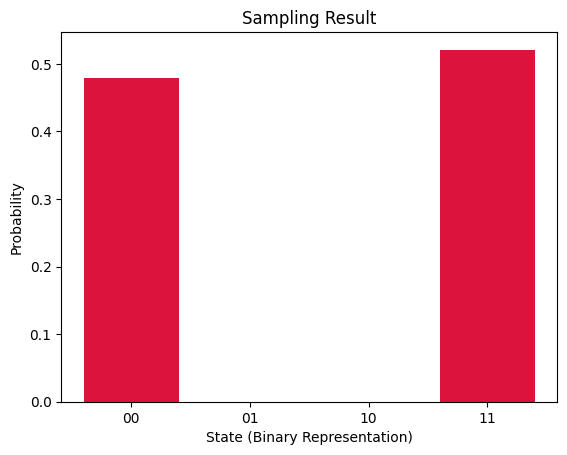

In [ ]:
visualize_sampling_result(sampling_result, total_shots=shots, options="complete")